# [Bonus Tasks](svm_segm.ipynb)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.ndimage as ndi
import skimage.morphology as morph
import skimage.util
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [7]:
def blend_result(img, seg, border_radius=1, interior_opacity=1, interior_opacity_decay=0.9, color=(0,1,0)):
    img  = np.dstack([img] * 3).copy()
    img -= img.min()
    img /= img.max()
    selem  = morph.disk(border_radius)
    seg_bd = np.logical_xor(morph.binary_dilation(seg, selem), morph.binary_erosion(seg, selem))
    mask_decay = ndi.distance_transform_edt(seg)
    for i in range(3):
        opacity = interior_opacity / pow(1 + mask_decay[seg], interior_opacity_decay)
        img[:,:,i][seg] = color[i] * opacity + (1 - opacity) * img[:,:,i][seg]
        img[:,:,i][seg_bd] = color[i]
    return img

In [8]:
patch_sizes = (32, 32)

---

**[Task 1.1.]()** Implement `create_data_matrix`:

In [ ]:
def create_data_matrix (img) :
    patches = skimage.util.view_as_windows(img, block_shape = patch_sizes)
    num_patches = patches.shape[0] * patches.shape[1]
    X = patches.reshape(num_patches, -1)

    return np.array(X)

**[Task 1.2.]()** Implement `create_gt_labels_vector`:

In [ ]:
def create_gt_labels_vector (img) :
    patches = skimage.util.view_as_windows(gt_img, block_shape = patch_sizes)
    gt_patches = gt_patches.reshape(n_blocks_x * n_blocks_y, -1)
    gt_labels = (gt_patches.mean(axis=1) > 0.5).astype(np.uint8)
    return gt_labels
    

**[Task 1.3.]()** Create the SVM classifier:

In [14]:
clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced', gamma=0.1))

**[Task 1.3 (a).]()** Create the data matrices for the images `dna-33` and `dna-44`:

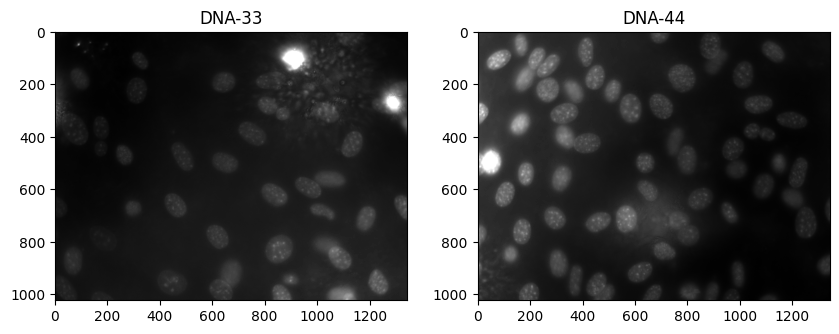

In [21]:
img_dna33 = plt.imread('data/NIH3T3/im/dna-33.png')
img_dna44 = plt.imread('data/NIH3T3/im/dna-44.png')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_dna33, 'gray')
plt.title('DNA-33')
plt.subplot(1,2,2)
plt.imshow(img_dna44, 'gray')
plt.title('DNA-44')
plt.show()

#create the data matrix for the images dna33 and dna44
data_matrix_33, n_blocks_x_33, n_blocks_y_33 = create_data_matrix(img_dna33)
data_matrix_44, n_blocks_x_44, n_blocks_y_44 = create_data_matrix(img_dna44)



**[Task 1.3 (b).]()** Create the corresponding ground truth label vectors:

In [23]:
# create the corresponding ground truth labels
gt_dna33 = plt.imread('data/NIH3T3/gt/33.png') > 0.5
gt_dna44 = plt.imread('data/NIH3T3/gt/44.png') > 0.5   
gt_labels_33 = create_gt_labels_vector(gt_dna33, n_blocks_x_33, n_blocks_y_33)
gt_labels_44 = create_gt_labels_vector(gt_dna44, n_blocks_x_44, n_blocks_y_44)


**[Task 1.3 (c).]()** Create the *combined* data matrices and ground truth label vectors:

**[Task 1.3 (d).]()** Train the classifier using the data matrix and label vectors from above:

**[Task 1.4.]()** Implement the function `predict_image`:

Test your implementation:

In [ ]:
img = plt.imread(f'data/NIH3T3/im/dna-0.png')
seg = predict_image(img)

plt.figure()
plt.imshow(blend_result(img, seg))

NameError: name 'predict_image' is not defined

**[Task 1.5.]()** Perform batch processing: